# ANOVA for Hypothesis Testing in Python

ANOVA (Analysis of Variance) is a robust statistical method used primarily to determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups. This technique is highly valuable in the field of data science for making informed decisions based on various groups of data. In this detailed guide, we will explore the fundamentals of ANOVA, dive into its implementation using Python, and illustrate the process with an example involving hypothesis testing for weight loss across different diets.

Certainly! Let's delve deeper into ANOVA (Analysis of Variance) to give you a more structured understanding of how this statistical tool is used for hypothesis testing in data science. We'll go through the concepts, implementation in Python, and provide a step-by-step explanation of the code to demonstrate how ANOVA helps in comparing multiple groups.

## What is ANOVA?

ANOVA is a statistical method used to compare the means of three or more groups to see if they are statistically different. This test is essential when we cannot simply eyeball the data to decide if group differences are significant due to natural variability in the data. 

### Key Concepts of ANOVA:

- **Groups and Variables**: In the context of ANOVA, the term "groups" refers to the different categories or levels of the independent variable (e.g., different diets). The dependent variable is what you measure or observe to compare these groups (e.g., weight loss).

- **Null Hypothesis (H0)**: The default assumption that there is no difference among the group means. 

- **Alternative Hypothesis (H1)**: The assumption that at least one group mean is different.

- **F-Ratio**: This is the statistic calculated by ANOVA and is a ratio of the variance estimated between groups to the variance estimated within groups. A higher F-ratio suggests that there are significant differences among group means.

- **P-Value**: This tells us the probability of observing our data (or more extreme) if the null hypothesis is true. A small p-value (typically < 0.05) leads us to reject the null hypothesis.

## Implementing ANOVA in Python

Let’s illustrate the process using a hypothetical study comparing the effectiveness of three diets.



### Step 1: Simulate Data
First, we generate some synthetic data to represent our study. Each diet has 20 participants, and their weight loss is recorded after following the diet.
Before performing ANOVA, data needs to be prepared or collected. In many scenarios, especially for teaching or demonstrative purposes, data might be simulated. In the example provided, we simulated data for three diet groups, assuming weight loss data follows a normal distribution for each group with specified means and standard deviations.

Normal Distribution: The assumption that data should follow a normal distribution is crucial for the validity of ANOVA results. This can be checked using plots (e.g., QQ plots) or statistical tests (e.g., Shapiro-Wilk test).

Variance Homogeneity: ANOVA assumes that all groups have similar variances, known as homoscedasticity. This can be checked using tests like Levene's or Bartlett’s test.

Independence: Data collected from different groups must be independent, meaning the data from one group should not influence the data from another.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)  # For reproducibility

n = 20  # Participants per group
data_a = np.random.normal(5, 1.5, n)  # Diet A
data_b = np.random.normal(6, 1.2, n)  # Diet B
data_c = np.random.normal(4.5, 1.8, n)  # Diet C

# Creating a DataFrame
df = pd.DataFrame({
    'Weight_Loss': np.concatenate([data_a, data_b, data_c]),
    'Diet': ['A']*n + ['B']*n + ['C']*n
})


We generate random numbers from a normal distribution to represent the weight loss for individuals in each diet group. This helps create a realistic dataset where the effects of each diet can be statistically tested.

# Step 2: Conducting ANOVA
Once the data is ready, we perform a one-way ANOVA to determine if there are significant differences among the means of the different groups.

In [2]:
from scipy import stats

# Calculate the F-statistic and P-value
f_value, p_value = stats.f_oneway(data_a, data_b, data_c)
print(f'F-Value: {f_value}, P-Value: {p_value}')


F-Value: 14.664807616379283, P-Value: 7.275769568989161e-06


The f_oneway function from scipy.stats calculates the F-statistic and its associated P-value. The F-statistic is the ratio of the variance between the groups' means to the variance within the groups. A higher F-statistic suggests a greater probability that there are significant differences between the means.
 
# Step 3: Visualizing the Data
Data visualization provides a visual validation of what the numerical results might suggest. Here are various ways to visualize:

Boxplot with Swarmplot
This combination allows us to see the spread and distribution of data points along with the median and interquartile ranges.

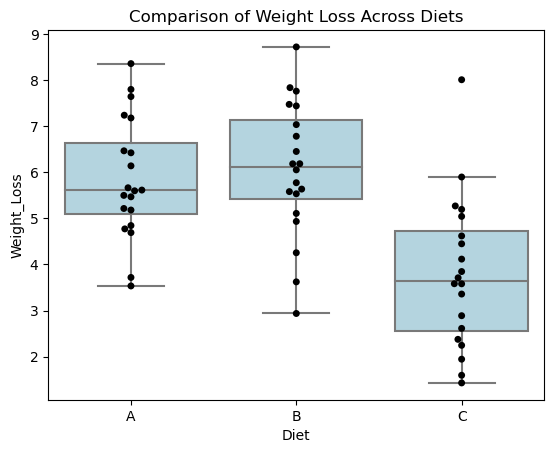

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Diet', y='Weight_Loss', data=df, color='lightblue', showfliers=False)
sns.swarmplot(x='Diet', y='Weight_Loss', data=df, color='black')
plt.title('Comparison of Weight Loss Across Diets')
plt.show()


## Histograms
Histograms show the distribution shape and outliers, which are crucial for assumptions in ANOVA.

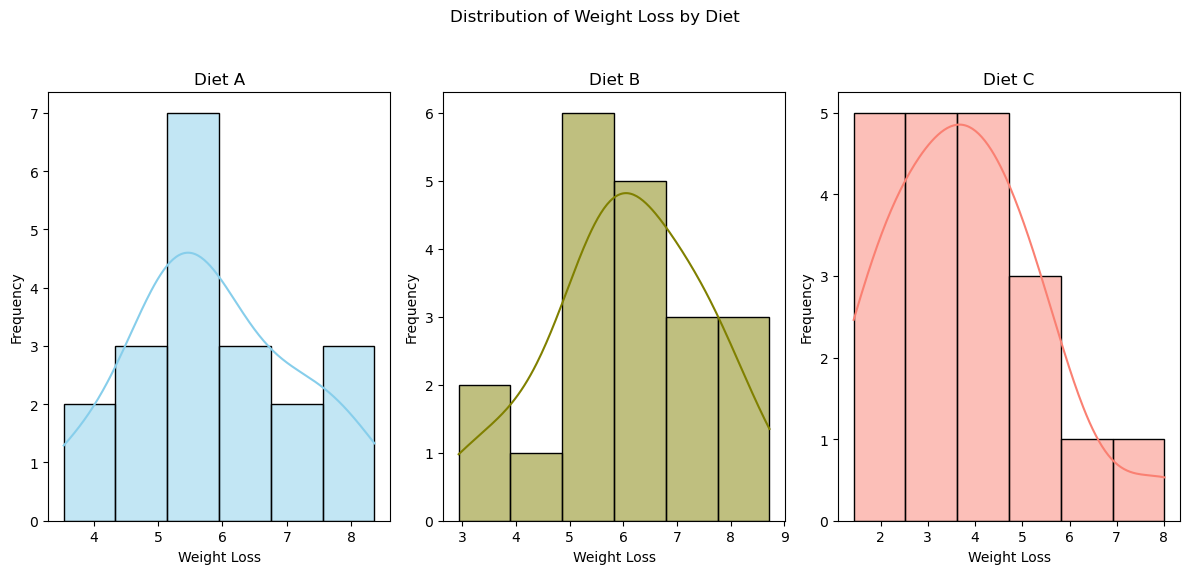

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
plt.suptitle('Distribution of Weight Loss by Diet')

# Plot each histogram
plt.subplot(1, 3, 1)
sns.histplot(data_a, kde=True, color='skyblue', label='Diet A')
plt.title('Diet A')
plt.xlabel('Weight Loss')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data_b, kde=True, color='olive', label='Diet B')
plt.title('Diet B')
plt.xlabel('Weight Loss')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data_c, kde=True, color='salmon', label='Diet C')
plt.title('Diet C')
plt.xlabel('Weight Loss')
plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit into figure area.
plt.show()


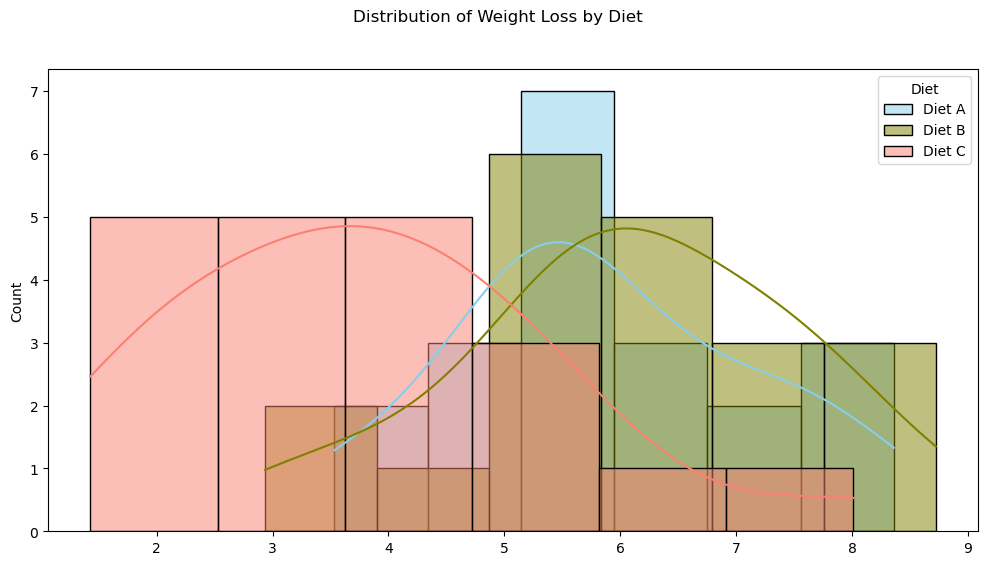

In [4]:
plt.figure(figsize=(12, 6))
plt.suptitle('Distribution of Weight Loss by Diet')
sns.histplot(data_a, kde=True, color='skyblue', label='Diet A')
sns.histplot(data_b, kde=True, color='olive', label='Diet B')
sns.histplot(data_c, kde=True, color='salmon', label='Diet C')
plt.legend(title='Diet')
plt.show()


## Violin Plots
These provide a more detailed representation of the data density and distribution

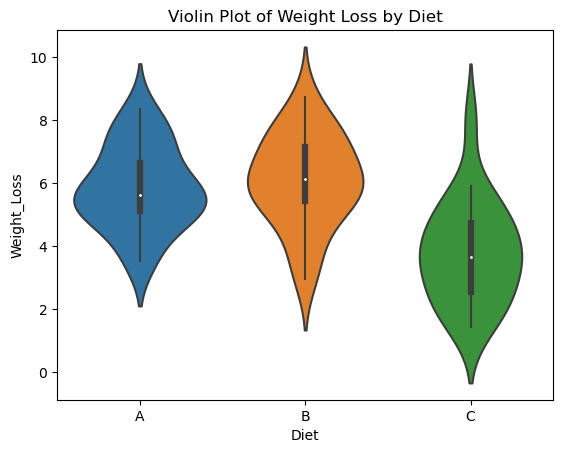

In [5]:
sns.violinplot(x='Diet', y='Weight_Loss', data=df)
plt.title('Violin Plot of Weight Loss by Diet')
plt.show()


# Step 4: Post-hoc Testing
After finding significant differences with ANOVA, post-hoc tests like Tukey's HSD are performed to find out which specific groups differ.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.2129  0.891 -0.9053  1.3311  False
     A      C  -2.0652 0.0001 -3.1834 -0.9469   True
     B      C   -2.278    0.0 -3.3963 -1.1598   True
----------------------------------------------------


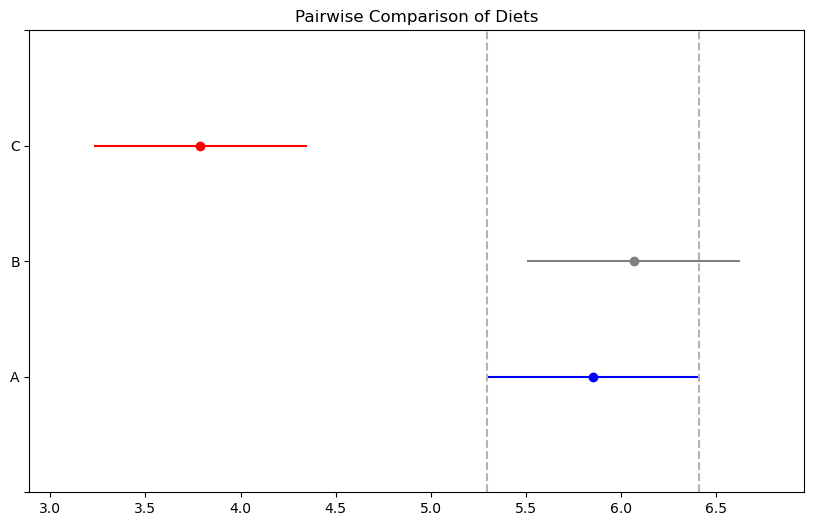

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=df['Weight_Loss'], groups=df['Diet'], alpha=0.05)
print(tukey_results)
tukey_results.plot_simultaneous(comparison_name='A')
plt.title('Pairwise Comparison of Diets')
plt.show()


Post-hoc tests are crucial when an ANOVA indicates significant differences, as they help pinpoint which groups are different. Tukey's HSD (Honestly Significant Difference) test compares all possible pairs of means while adjusting for multiple comparisons to maintain the error rate.

These steps, taken together, form a robust approach to using ANOVA in hypothesis testing, allowing for a thorough analysis of the data and confident decision-making based on statistical evidence.